In [ ]:
from google.colab import files
uploaded = files.upload()  # upload the zipped dataset


Saving alt.atheism.txt.zip to alt.atheism.txt (2).zip


TF-IDF matrix shape: (754, 15742)
SVD reduced shape: (754, 2)


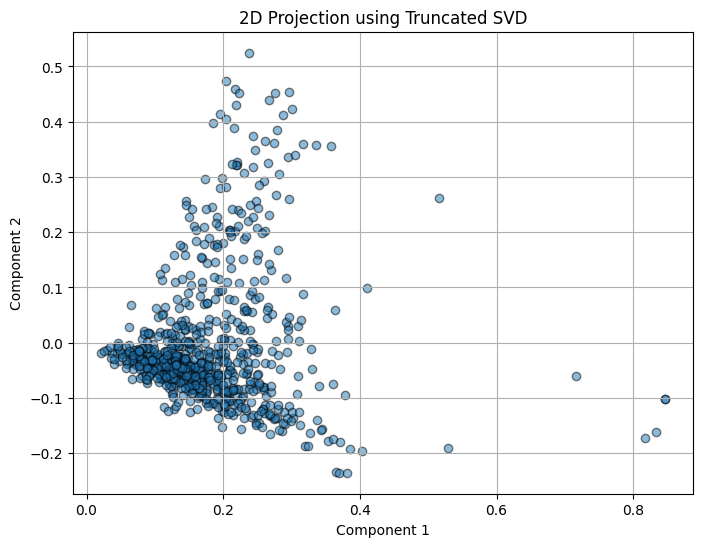

Silhouette Score for 20 clusters: 0.321


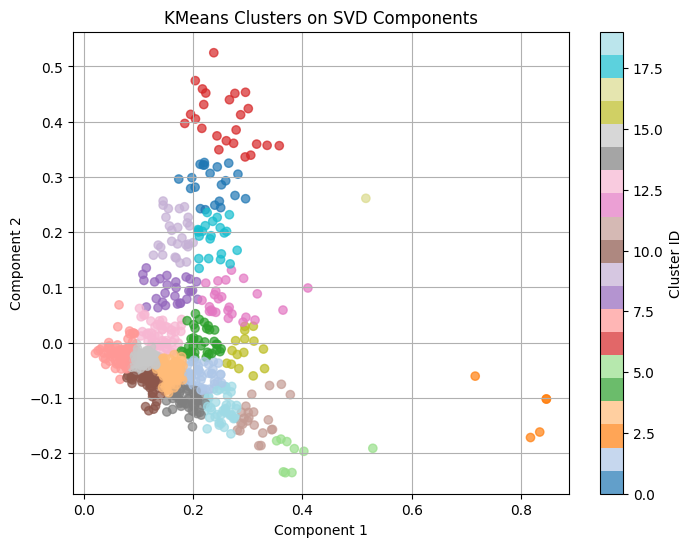

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load the text file (with encoding fix)
file_path = "/content/alt.atheism.txt"
with open(file_path, encoding='utf-8', errors='ignore') as f:
    documents = f.read().split("\n\nFrom:")

# 2. Clean up the documents
documents = [doc.strip() for doc in documents if len(doc.strip()) > 20]

# 3. Apply TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X_tfidf = vectorizer.fit_transform(documents)
print("TF-IDF matrix shape:", X_tfidf.shape)

# 4. Apply SVD (TruncatedSVD works for sparse matrices)
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)
print("SVD reduced shape:", X_reduced.shape)

# 5. Plot SVD 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, edgecolor='k')
plt.title("2D Projection using Truncated SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

# 6. Optional: KMeans clustering
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# 7. Evaluate clustering
sil_score = silhouette_score(X_reduced, clusters)
print(f"Silhouette Score for {n_clusters} clusters: {sil_score:.3f}")

# 8. Plot with cluster colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='tab20', alpha=0.7)
plt.title("KMeans Clusters on SVD Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter, label="Cluster ID")
plt.grid(True)
plt.show()




In [ ]:
# EXPLANATION
#
# • Why Dimensionality Reduction is Used:
#   TF-IDF creates a very high-dimensional and sparse matrix (mostly zeros).
#   Reducing dimensions makes the data easier to visualize and faster to process.
#
# • What SVD/PCA Achieves:
#   TruncatedSVD (similar to PCA) identifies directions (components) that capture most variance in the data,
#   enabling us to project the high-dimensional space into 2D meaningfully.
#
# • How Clustering Helps Without Labels:
#   Clustering (e.g. KMeans) groups similar documents based on content, revealing hidden patterns or topics.
#   This unsupervised method helps explore and understand data structure without needing any labels.

